In [27]:
import os
import json

results_dict = {}
folder_path = "scored_llama"

for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        full_path = os.path.join(folder_path, filename)

        with open(full_path, "r") as f:
            lines = json.load(f)

        is_correct = 0
        score = 0
        count = 0

        # print(filename)

        for line in lines:
            is_correct += line["judgment"]["is_correct"]
            score += line["judgment"]["score"]
            count += 1

        results_dict[f"{filename} avg_is_correct"] = is_correct / count if count else 0
        results_dict[f"{filename} avg_score"] = score / count if count else 0

In [28]:
results_dict

{'qwen-3b-raw.json avg_is_correct': 0.6439169139465876,
 'qwen-3b-raw.json avg_score': 3.863501483679525,
 'qwen-1.5b-ret-robust.json avg_is_correct': 0.45103857566765576,
 'qwen-1.5b-ret-robust.json avg_score': 3.0949554896142435,
 'Llama_70B_default.json avg_is_correct': 0.7744807121661721,
 'Llama_70B_default.json avg_score': 4.267062314540059,
 'qwen-1.5b-raft.json avg_is_correct': 0.43471810089020774,
 'qwen-1.5b-raft.json avg_score': 3.1320474777448073,
 'qwen-1.5b-ru.json avg_is_correct': 0.4050445103857567,
 'qwen-1.5b-ru.json avg_score': 2.986646884272997,
 'Qwen2.5-32B-Default.json avg_is_correct': 0.7700296735905044,
 'Qwen2.5-32B-Default.json avg_score': 4.286350148367952,
 'qwen-3b-raw-raft.json avg_is_correct': 0.6394658753709199,
 'qwen-3b-raw-raft.json avg_score': 3.7670623145400595,
 'qwen-1.5b-webglm-final.json avg_is_correct': 0.5370919881305638,
 'qwen-1.5b-webglm-final.json avg_score': 3.3753709198813056,
 'qwen-3b-raft.json avg_is_correct': 0.6661721068249258,
 'q

In [2]:
import os
import json
from collections import defaultdict

results_dict = {}
data_is_correct = {}
folder_path = "scored_llama"

for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        full_path = os.path.join(folder_path, filename)

        with open(full_path, "r") as f:
            lines = json.load(f)

        refusal_count = 0
        appropriate_refusal_count = 0
        inappropriate_refusal_count = 0

        type_stats = defaultdict(lambda: {"is_correct": 0, "score": 0, "count": 0})

        for line in lines:
            qtype = line["table_data"].get("Тип вопроса", "unknown")
            if qtype == "No info":
                qtype = "No Info"
            if qtype == "Логический вывод":
                qtype = "Logical Thinking"
            if qtype == "Multi block":
                qtype = "Multi Block"
            if qtype == "Logical thinking":
                qtype = "Logical Thinking"
            if qtype == "Double ":
                qtype = "Double"
            if qtype == "Multi block ":
                qtype = "Multi Block"
            
            type_stats[qtype]["is_correct"] += line["judgment"]["is_correct"]
            type_stats[qtype]["score"] += line["judgment"]["score"]
            type_stats[qtype]["count"] += 1

            if qtype == "No Info" and line["judgment"]["is_correct"]:
                appropriate_refusal_count += 1
                refusal_count += 1
            refusal_count += line["judgment"]["is_inappropriate_refusal"]
            inappropriate_refusal_count += line["judgment"]["is_inappropriate_refusal"]

        for qtype, stats in type_stats.items():
            count = stats["count"]
            avg_is_correct = stats["is_correct"] / count if count else 0
            avg_score = stats["score"] / count if count else 0
            results_dict[f"{filename[:-5]} | {qtype} | avg_is_correct"] = avg_is_correct
            results_dict[f"{filename[:-5]} | {qtype} | avg_score"] = avg_score
            
            if filename[:-5] not in data_is_correct:
                data_is_correct[filename[:-5]] = {}
            data_is_correct[filename[:-5]][qtype] = avg_is_correct

        print(f"{filename[:-5]} \nrefusal rate: {refusal_count / 674} \nappropriate refusal rate: {appropriate_refusal_count / type_stats['No Info']['count']} \ninappropriate refusal rate: {inappropriate_refusal_count / 674}\nbad refusal rate:{inappropriate_refusal_count / refusal_count}\n\n\n")


# for k, v in results_dict.items():
#     if k[-25:] == "avg_inappropriate_refusal":
#         print(f"{k}: {v:.3f}")

qwen-3b-raw 
refusal rate: 0.2997032640949555 
appropriate refusal rate: 0.9523809523809523 
inappropriate refusal rate: 0.21068249258160238
bad refusal rate:0.7029702970297029



qwen-1.5b-ret-robust 
refusal rate: 0.04302670623145401 
appropriate refusal rate: 0.20634920634920634 
inappropriate refusal rate: 0.02373887240356083
bad refusal rate:0.5517241379310345



Llama_70B_default 
refusal rate: 0.19287833827893175 
appropriate refusal rate: 0.9047619047619048 
inappropriate refusal rate: 0.1083086053412463
bad refusal rate:0.5615384615384615



qwen-1.5b-raft 
refusal rate: 0.4332344213649852 
appropriate refusal rate: 0.873015873015873 
inappropriate refusal rate: 0.3516320474777448
bad refusal rate:0.8116438356164384



qwen-1.5b-ru 
refusal rate: 0.39762611275964393 
appropriate refusal rate: 0.6825396825396826 
inappropriate refusal rate: 0.33382789317507416
bad refusal rate:0.8395522388059702



Qwen2.5-32B-Default 
refusal rate: 0.20919881305637983 
appropriate refusal rate

In [2]:
# data_is_correct

In [3]:
import matplotlib.pyplot as plt
import os

# Создаем папку для сохранения графиков
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# Построение и сохранение графиков
for filename, qtypes in data_is_correct.items():
    # Сортируем типы вопросов по значению (от большего к меньшему)
    sorted_qtypes = sorted(qtypes.items(), key=lambda x: x[1], reverse=True)
    types = [t[0] for t in sorted_qtypes]
    values = [t[1] for t in sorted_qtypes]

    # Создаем график
    plt.figure(figsize=(12, 6))
    bars = plt.bar(types, values, color="skyblue")
    
    # Добавляем подписи значений
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f"{height:.2f}", 
            ha="center", 
            va="bottom"
        )
    
    # Настраиваем внешний вид
    plt.title(f"Средняя точность ответов\n({filename})", fontsize=14)
    plt.xlabel("Тип вопроса", fontsize=12)
    plt.ylabel("Доля правильных ответов", fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Сохраняем график
    plot_filename = os.path.join(output_folder, f"{filename[:-5]}_plot.png")
    plt.tight_layout()
    plt.savefig(plot_filename, dpi=150)
    plt.close()

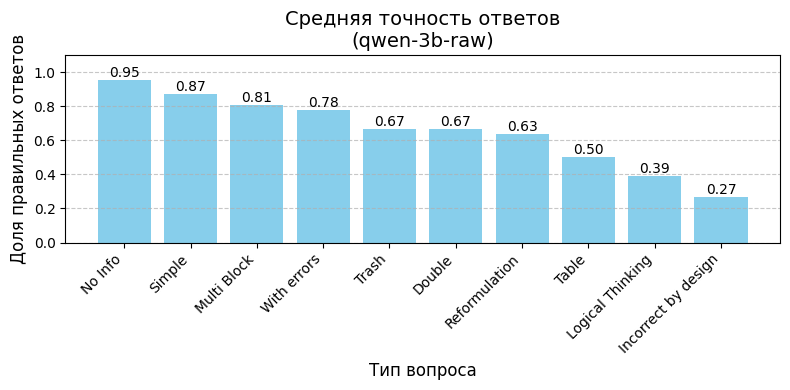

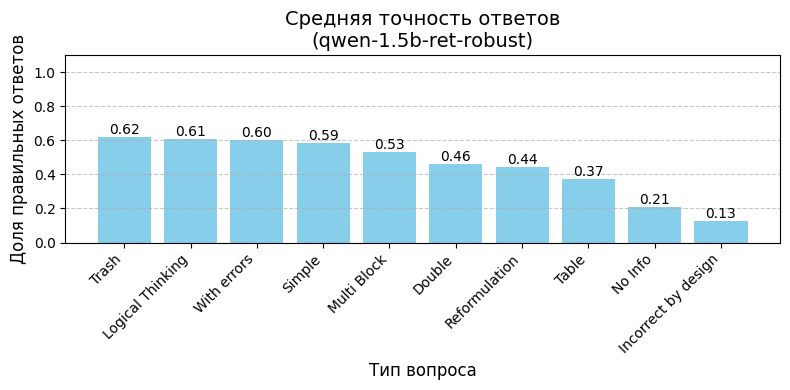

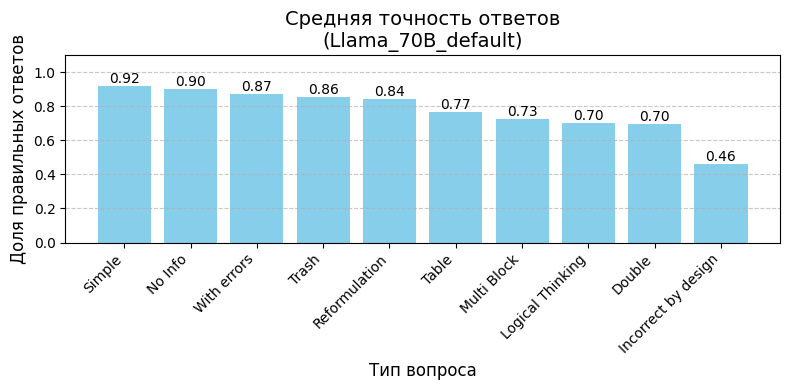

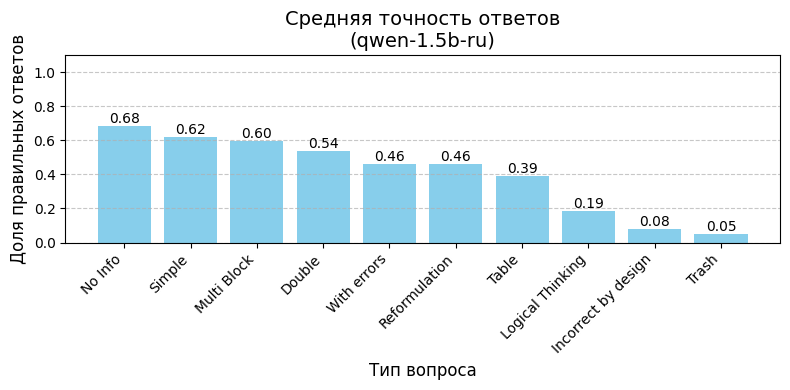

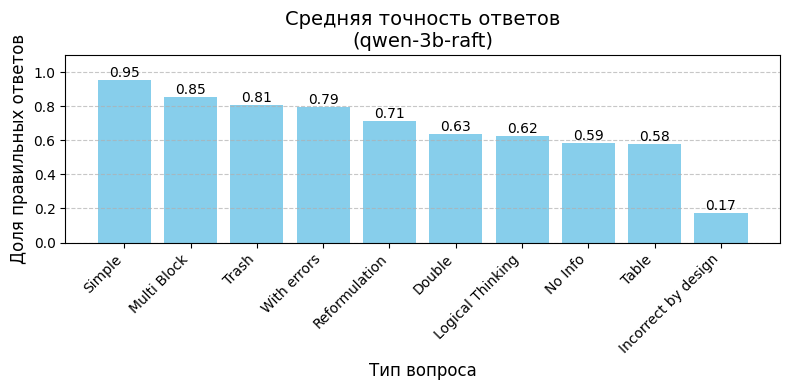

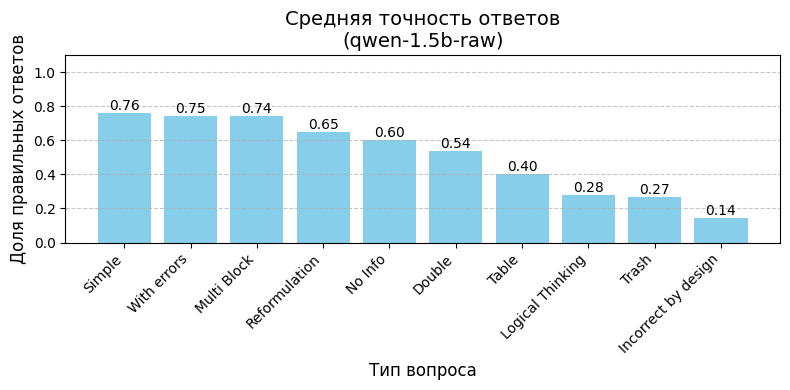

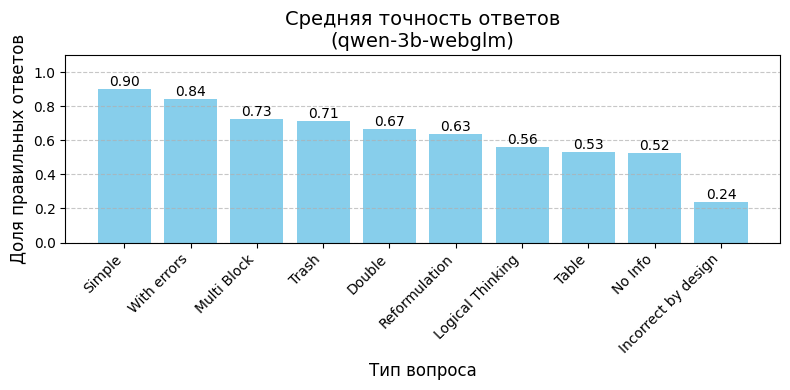

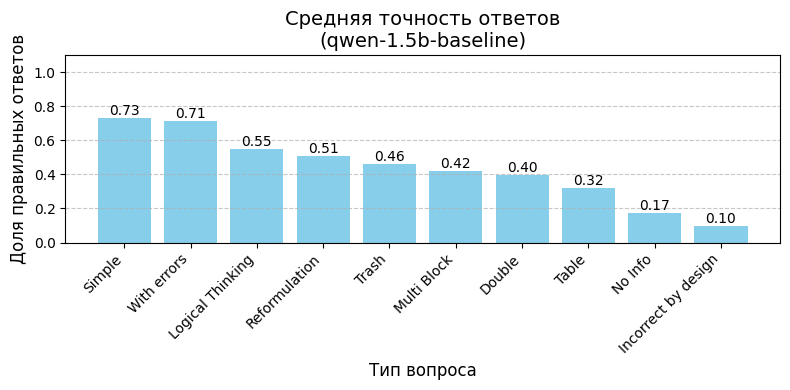

In [22]:
import matplotlib.pyplot as plt

# Построение графиков по каждому файлу
for filename, qtypes in data_is_correct.items():
    sorted_qtypes = sorted(qtypes.items(), key=lambda x: x[1], reverse=True)
    types = [t[0] for t in sorted_qtypes]
    values = [t[1] for t in sorted_qtypes]

    plt.figure(figsize=(8, 4))
    bars = plt.bar(types, values, color="skyblue")
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", 
                 ha="center", va="bottom")

    plt.title(f"Средняя точность ответов\n({filename})", fontsize=14)
    plt.xlabel("Тип вопроса", fontsize=12)
    plt.ylabel("Доля правильных ответов", fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


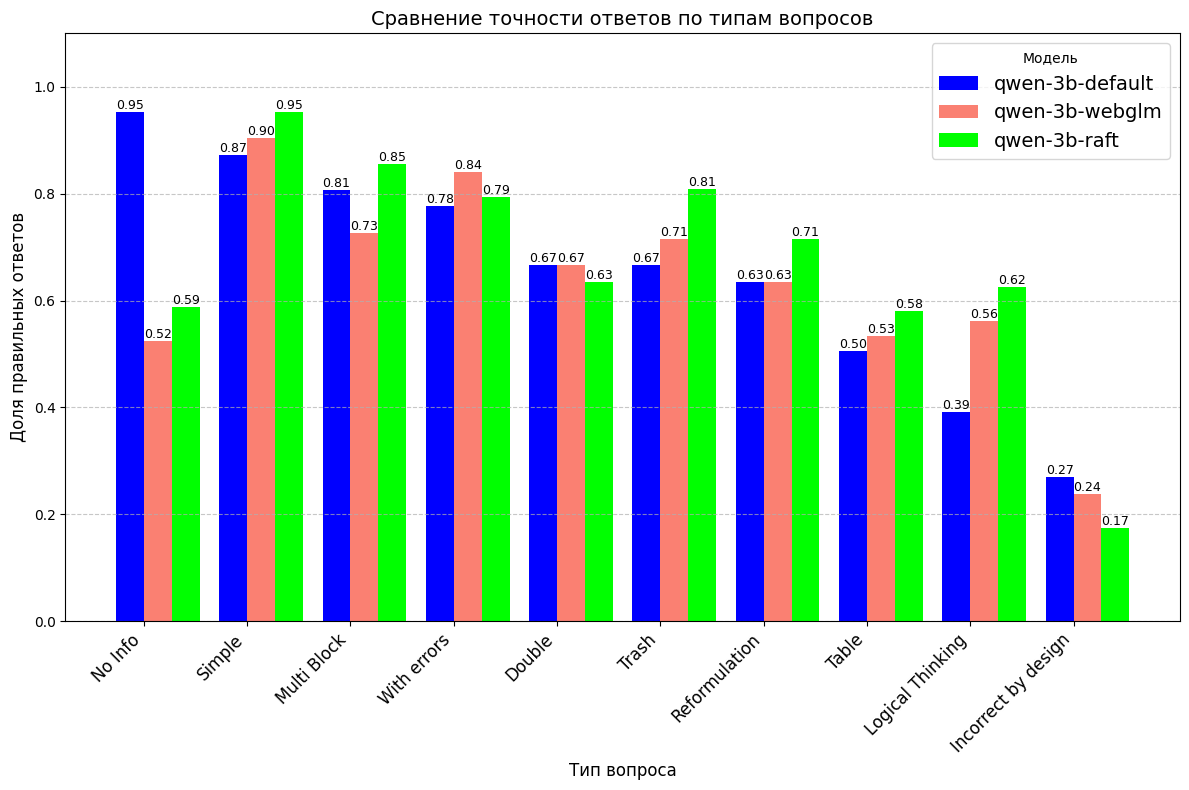

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare model data and configuration
models = ["qwen-3b-raw", "qwen-3b-webglm", "qwen-3b-raft"]
colors = ['blue', 'salmon', 'lime']

# Create unified question type index
all_qtypes = set()
for model in models:
    all_qtypes.update(data_is_correct.get(model, {}).keys())

# Sort question types by first model's performance (with fallback)
sorted_qtypes = sorted(all_qtypes, 
    key=lambda x: (-data_is_correct[models[0]].get(x, 0), x))

# Prepare aligned data matrix
values = {}
for model in models:
    model_data = data_is_correct.get(model, {})
    values[model] = [model_data.get(qtype, 0) for qtype in sorted_qtypes]

# Plot configuration
x = np.arange(len(sorted_qtypes))
width = 0.27

plt.figure(figsize=(12, 8))

# Create grouped bars
bars = []
for i, model in enumerate(models):
    if model == "qwen-3b-webglm":
        model_name = "qwen-3b-webglm"
    elif model == "qwen-3b-raft":
        model_name = "qwen-3b-raft"
    elif model == "qwen-3b-raw":
        model_name = "qwen-3b-default"

    offset = width * i
    bars.append(plt.bar(x + offset, values[model], width,
                     color=colors[i], label=model_name))

# Add value annotations
for model_bars in bars:
    for bar in model_bars:
        height = bar.get_height()
        if height > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                    ha='center', va='bottom', fontsize=9)

# Configure axes and labels
plt.title("Сравнение точности ответов по типам вопросов", fontsize=14)
plt.xlabel("Тип вопроса", fontsize=12)
plt.ylabel("Доля правильных ответов", fontsize=12)
plt.xticks(x + width/2, sorted_qtypes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Модель', fontsize=14)
plt.tight_layout()
plt.show()

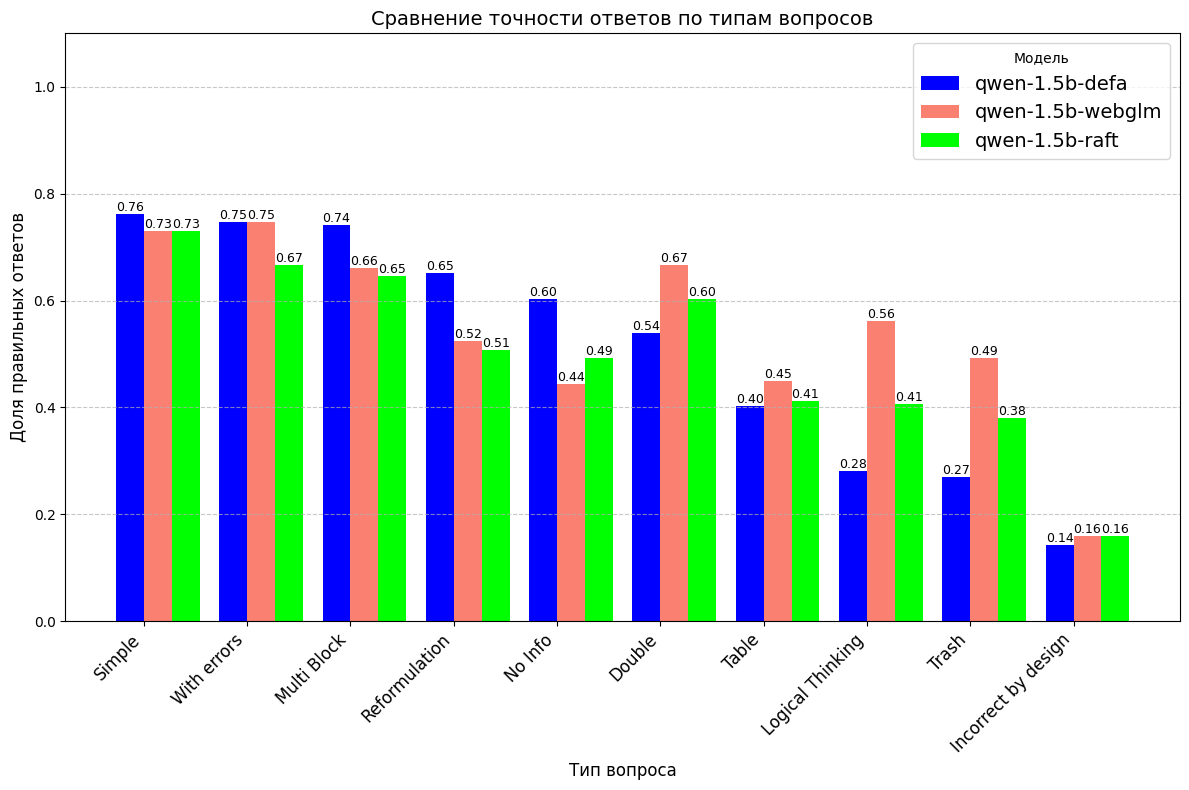

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare model data and configuration
models = ["qwen-1.5b-raw", "qwen-1.5b-webglm-final", "qwen-1.5b-raft-final"]
colors = ['blue', 'salmon', 'lime']

# Create unified question type index
all_qtypes = set()
for model in models:
    all_qtypes.update(data_is_correct.get(model, {}).keys())

# Sort question types by first model's performance (with fallback)
sorted_qtypes = sorted(all_qtypes, 
    key=lambda x: (-data_is_correct[models[0]].get(x, 0), x))

# Prepare aligned data matrix
values = {}
for model in models:
    model_data = data_is_correct.get(model, {})
    values[model] = [model_data.get(qtype, 0) for qtype in sorted_qtypes]

# Plot configuration
x = np.arange(len(sorted_qtypes))
width = 0.27

plt.figure(figsize=(12, 8))

# Create grouped bars
bars = []
for i, model in enumerate(models):
    if model == "qwen-1.5b-webglm-final":
        model_name = "qwen-1.5b-webglm"
    elif model == "qwen-1.5b-raft-final":
        model_name = "qwen-1.5b-raft"
    elif model == "qwen-1.5b-raw":
        model_name = "qwen-1.5b-default"
        
    offset = width * i
    bars.append(plt.bar(x + offset, values[model], width,
                     color=colors[i], label=model_name))

# Add value annotations
for model_bars in bars:
    for bar in model_bars:
        height = bar.get_height()
        if height > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                    ha='center', va='bottom', fontsize=9)

# Configure axes and labels
plt.title("Сравнение точности ответов по типам вопросов", fontsize=14)
plt.xlabel("Тип вопроса", fontsize=12)
plt.ylabel("Доля правильных ответов", fontsize=12)
plt.xticks(x + width/2, sorted_qtypes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Модель', fontsize=14)
plt.tight_layout()
plt.show()

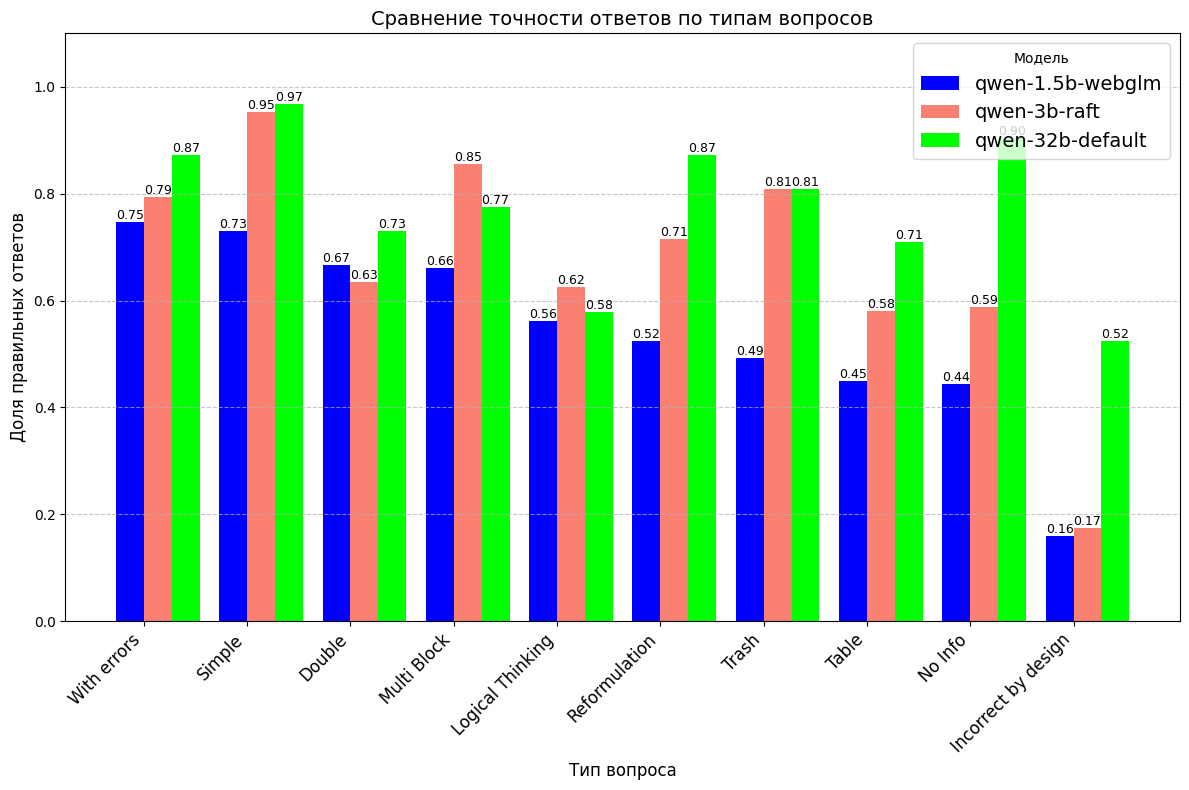

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare model data and configuration
models = ["qwen-1.5b-webglm-final", "qwen-3b-raft", "Qwen2.5-32B-Default"]
colors = ['blue', 'salmon', 'lime']

# Create unified question type index
all_qtypes = set()
for model in models:
    all_qtypes.update(data_is_correct.get(model, {}).keys())

# Sort question types by first model's performance (with fallback)
sorted_qtypes = sorted(all_qtypes, 
    key=lambda x: (-data_is_correct[models[0]].get(x, 0), x))

# Prepare aligned data matrix
values = {}
for model in models:
    model_data = data_is_correct.get(model, {})
    values[model] = [model_data.get(qtype, 0) for qtype in sorted_qtypes]

# Plot configuration
x = np.arange(len(sorted_qtypes))
width = 0.27

plt.figure(figsize=(12, 8))

# Create grouped bars
bars = []
for i, model in enumerate(models):
    if model == "qwen-1.5b-webglm-final":
        model_name = "qwen-1.5b-webglm"
    elif model == "qwen-3b-raft":
        model_name = "qwen-3b-raft"
    elif model == "Qwen2.5-32B-Default":
        model_name = "qwen-32b-default"
    offset = width * i
    bars.append(plt.bar(x + offset, values[model], width,
                     color=colors[i], label=model_name))

# Add value annotations
for model_bars in bars:
    for bar in model_bars:
        height = bar.get_height()
        if height > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                    ha='center', va='bottom', fontsize=9)

# Configure axes and labels
plt.title("Сравнение точности ответов по типам вопросов", fontsize=14)
plt.xlabel("Тип вопроса", fontsize=12)
plt.ylabel("Доля правильных ответов", fontsize=12)
plt.xticks(x + width/2, sorted_qtypes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Модель', fontsize=14)
plt.tight_layout()
plt.show()

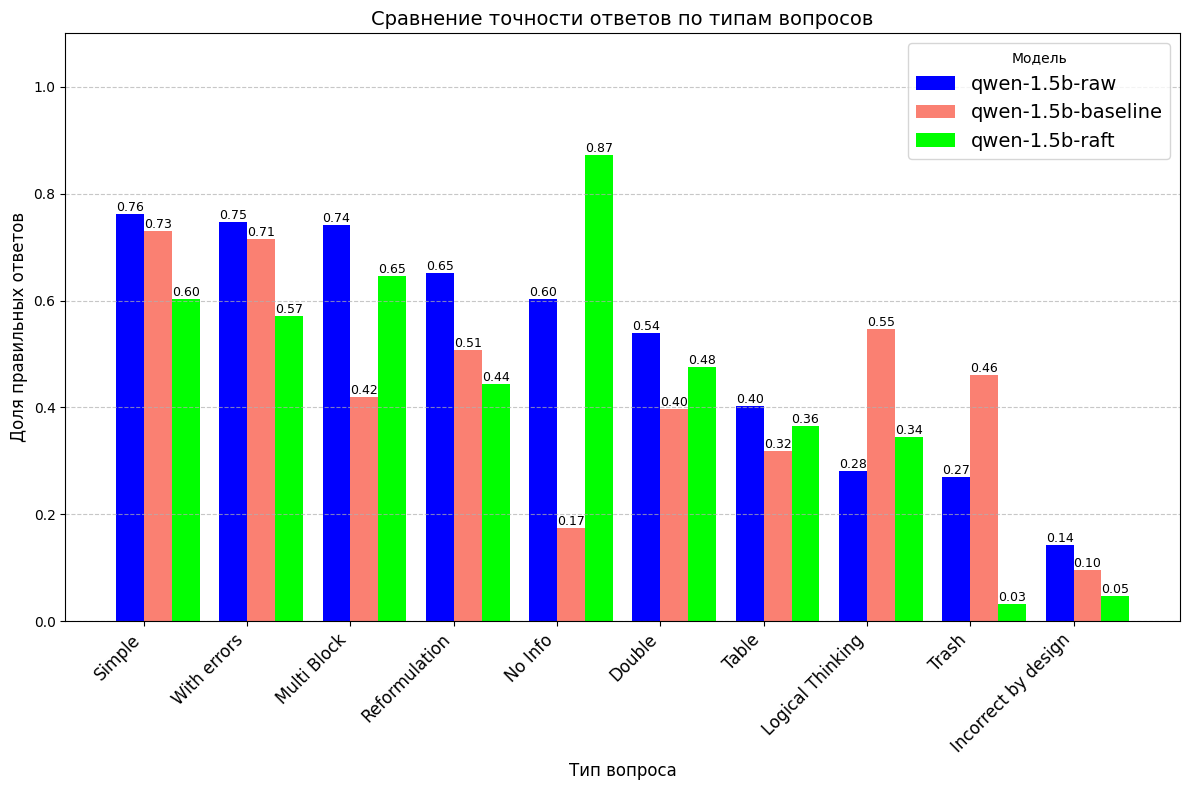

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare model data and configuration
models = ["qwen-1.5b-raw", "qwen-1.5b-baseline", "qwen-1.5b-raft"]
colors = ['blue', 'salmon', 'lime']


# Create unified question type index
all_qtypes = set()
for model in models:
    all_qtypes.update(data_is_correct.get(model, {}).keys())

# Sort question types by first model's performance (with fallback)
sorted_qtypes = sorted(all_qtypes, 
    key=lambda x: (-data_is_correct[models[0]].get(x, 0), x))

# Prepare aligned data matrix
values = {}
for model in models:
    model_data = data_is_correct.get(model, {})
    values[model] = [model_data.get(qtype, 0) for qtype in sorted_qtypes]

# Plot configuration
x = np.arange(len(sorted_qtypes))
width = 0.27

plt.figure(figsize=(12, 8))

# Create grouped bars
bars = []
for i, model in enumerate(models):
    offset = width * i
    bars.append(plt.bar(x + offset, values[model], width,
                     color=colors[i], label=model))

# Add value annotations
for model_bars in bars:
    for bar in model_bars:
        height = bar.get_height()
        if height > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                    ha='center', va='bottom', fontsize=9)

# Configure axes and labels
plt.title("Сравнение точности ответов по типам вопросов", fontsize=14)
plt.xlabel("Тип вопроса", fontsize=12)
plt.ylabel("Доля правильных ответов", fontsize=12)
plt.xticks(x + width/2, sorted_qtypes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Модель', fontsize=14)
plt.tight_layout()
plt.show()

In [3]:
import os
import json
from collections import defaultdict

results_dict = {}
data_is_correct = {}
folder_path = "scored_llama"

for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        full_path = os.path.join(folder_path, filename)

        with open(full_path, "r") as f:
            lines = json.load(f)

        refusal_count = 0
        appropriate_refusal_count = 0
        inappropriate_refusal_count = 0

        type_stats = defaultdict(lambda: {"is_correct": 0, "score": 0, "count": 0})

        for line in lines:
            qtype = line["table_data"].get("Сет документов", "unknown")
            
            type_stats[qtype]["is_correct"] += line["judgment"]["is_correct"]
            type_stats[qtype]["score"] += line["judgment"]["score"]
            type_stats[qtype]["count"] += 1

        for qtype, stats in type_stats.items():
            count = stats["count"]
            avg_is_correct = stats["is_correct"] / count if count else 0
            avg_score = stats["score"] / count if count else 0
            results_dict[f"{filename[:-5]} | {qtype} | avg_is_correct"] = avg_is_correct
            results_dict[f"{filename[:-5]} | {qtype} | avg_score"] = avg_score
            
            if filename[:-5] not in data_is_correct:
                data_is_correct[filename[:-5]] = {}
            data_is_correct[filename[:-5]][qtype] = avg_is_correct

# for k, v in results_dict.items():
#     if k[-25:] == "avg_inappropriate_refusal":
#         print(f"{k}: {v:.3f}")

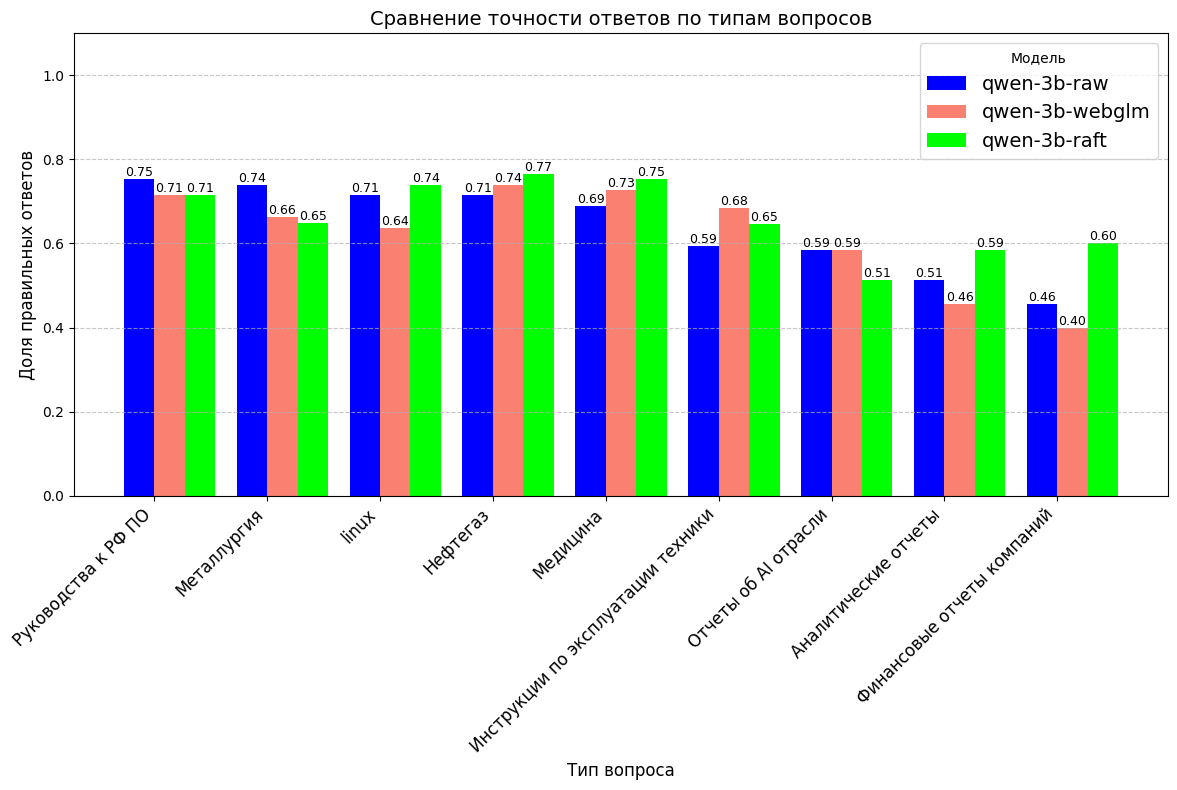

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare model data and configuration
models = ["qwen-3b-raw", "qwen-3b-webglm", "qwen-3b-raft"]
colors = ['blue', 'salmon', 'lime']

# Create unified question type index
all_qtypes = set()
for model in models:
    all_qtypes.update(data_is_correct.get(model, {}).keys())

# Sort question types by first model's performance (with fallback)
sorted_qtypes = sorted(all_qtypes, 
    key=lambda x: (-data_is_correct[models[0]].get(x, 0), x))

# Prepare aligned data matrix
values = {}
for model in models:
    model_data = data_is_correct.get(model, {})
    values[model] = [model_data.get(qtype, 0) for qtype in sorted_qtypes]

# Plot configuration
x = np.arange(len(sorted_qtypes))
width = 0.27

plt.figure(figsize=(12, 8))

# Create grouped bars
bars = []
for i, model in enumerate(models):
    offset = width * i
    bars.append(plt.bar(x + offset, values[model], width,
                     color=colors[i], label=model))

# Add value annotations
for model_bars in bars:
    for bar in model_bars:
        height = bar.get_height()
        if height > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                    ha='center', va='bottom', fontsize=9)

# Configure axes and labels
plt.title("Сравнение точности ответов по типам вопросов", fontsize=14)
plt.xlabel("Тип вопроса", fontsize=12)
plt.ylabel("Доля правильных ответов", fontsize=12)
plt.xticks(x + width/2, sorted_qtypes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Модель', fontsize=14)
plt.tight_layout()
plt.show()